In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("../../")

from experiment import Exp

from dataloaders import data_set,data_dict
import torch
import yaml
import os

# 参数设置

# 训练参数 
除了路径 其他不要变

In [2]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

args = dotdict()   
# TODO change the path as relative path
args.to_save_path     = r"E:\TECO_Works\Conference\ISWC2022\Run_logs"              
args.freq_save_path   = r"E:\TECO_Works\Conference\ISWC2022\Freq_data"
args.window_save_path = r"E:\TECO_Works\Conference\ISWC2022\Sliding_window"
args.root_path        = r"E:\datasets"


args.drop_transition  = False
args.datanorm_type    = "standardization" # None ,"standardization", "minmax"


args.batch_size       = 128                                                     
args.shuffle          = True
args.drop_last        = False
args.train_vali_quote = 0.90                                           


# training setting 
args.train_epochs            = 5

args.learning_rate           = 0.001  
args.learning_rate_patience  = 5
args.learning_rate_factor    = 0.1


args.early_stop_patience     = 15

args.use_gpu                 = True if torch.cuda.is_available() else False
args.gpu                     = 0
args.use_multi_gpu           = False

args.optimizer               = "Adam"
args.criterion               = "CrossEntropy"

## 数据参数



In [3]:
args.seed                             = 1


args.data_name                        =  "oppo"

args.wavelet_filtering                = False
args.wavelet_filtering_regularization = False
args.wavelet_filtering_finetuning     = False
args.wavelet_filtering_finetuning_percent = 0.2

args.regulatization_tradeoff          = 0.0001
args.number_wavelet_filtering         = 10


args.difference       = False 
args.filtering        =  False
args.magnitude        =  False
args.weighted_sampler = False




args.pos_select       = None
args.sensor_select    = None


args.representation_type = "time"
args.exp_mode            = "LOCV"

config_file = open('../../configs/data.yaml', mode='r')
data_config = yaml.load(config_file, Loader=yaml.FullLoader)
config = data_config[args.data_name]

args.root_path       = os.path.join(args.root_path,config["filename"])
args.sampling_freq   = config["sampling_freq"]
args.num_classes     =  config["num_classes"]
window_seconds       = config["window_seconds"]
args.windowsize      =   int(window_seconds * args.sampling_freq) 
args.input_length    =  args.windowsize
# input information
args.c_in            = config["num_channels"]

if args.wavelet_filtering :
    
    if args.windowsize%2==1:
        N_ds = int(torch.log2(torch.tensor(args.windowsize-1)).floor()) - 2
    else:
        N_ds = int(torch.log2(torch.tensor(args.windowsize)).floor()) - 2

    args.f_in            =  args.number_wavelet_filtering*N_ds+1
else:
    args.f_in            =  1



## 模型参数

In [4]:
args.filter_scaling_factor = 0.25
args.model_type              = "deepconvlstm"

# 实验

In [5]:
exp = Exp(args)

Use GPU: cuda:0
Build the DeepConvLSTM model!
Done!
Parameter : 5377106
Set the seed as :  1


 ----------------------- load all the data -------------------
-----------------------Sliding file are generated -----------------------
-----------------------Sliding file are generated -----------------------
================ LOCV Mode ====================
================ 4 CV ======================
================ the 0 th CV Experiment ================ 
Leave one Out Experiment : The 1 Part as the test
[-] Target sampling weights:  [3.63834819e-05 1.68350168e-03 1.64203612e-03 1.74520070e-03
 1.68634064e-03 1.17785630e-03 1.33333333e-03 1.82481752e-03
 2.05761317e-03 2.70270270e-03 3.21543408e-03 3.21543408e-03
 3.58422939e-03 2.51256281e-03 2.52525253e-03 1.30039012e-03
 4.48430493e-04 1.96463654e-03]
Train data number :  38060
The number of classes is :  18
The input_length  is :  30
The channel_in is :  77
Validation data number :  4229
Test data number :  78162
================ Build the model ================ 
Build the DeepConvLSTM model!
Epoch: 1 cost time: 61.235907554626

Epoch: 3 cost time: 64.00838327407837
VALI: Epoch: 3, Steps: 318 | Train Loss: 0.3329739  Vali Loss: 0.3176795 Vali Accuracy: 0.8935462  Vali weighted F1: 0.8928607  Vali macro F1 0.6992568 
new best score!!!!
Validation loss decreased (0.358893 --> 0.317680).  Saving model ...
new best score!!!!
Epoch: 4 cost time: 64.11701083183289
VALI: Epoch: 4, Steps: 318 | Train Loss: 0.2881464  Vali Loss: 0.2678042 Vali Accuracy: 0.9099579  Vali weighted F1: 0.9071349  Vali macro F1 0.7398484 
new best score!!!!
Validation loss decreased (0.317680 --> 0.267804).  Saving model ...
new best score!!!!
Epoch: 5 cost time: 63.906874895095825
VALI: Epoch: 5, Steps: 318 | Train Loss: 0.2533076  Vali Loss: 0.2454098 Vali Accuracy: 0.9170548  Vali weighted F1: 0.9154790  Vali macro F1 0.7845829 
new best score!!!!
Validation loss decreased (0.267804 --> 0.245410).  Saving model ...
new best score!!!!
Loading the best validation model!
Final Test Performance : Test Accuracy: 0.7338040  Test weighted F1: 0

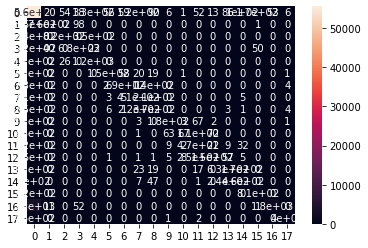

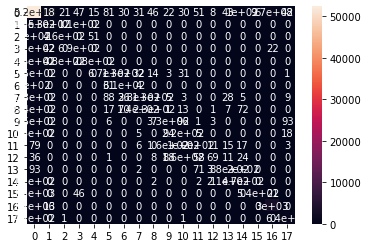

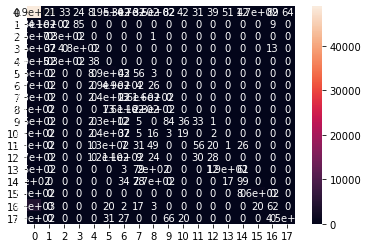

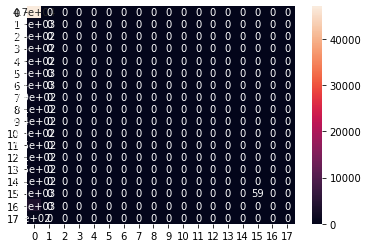

In [6]:
exp.train()

In [7]:
0.05+0.51+0.34+0.51

1.4100000000000001